In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bljsales = pd.read_csv("Balaji Fast Food Sales.csv")

In [4]:
bljsales.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [5]:
bljsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


### 1: First to find null values in this dataframe

<Axes: >

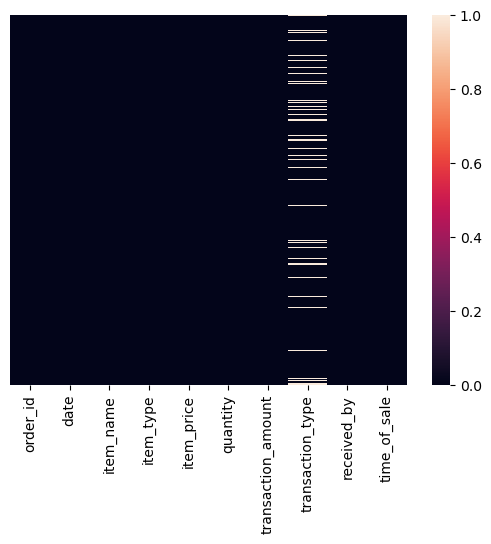

In [6]:
sns.heatmap(bljsales.isnull(), yticklabels = False)

### 2: Converting date format of date column in bljsales dataframe

In [7]:
bljsales['date'] = pd.to_datetime(bljsales['date'],format='mixed')

In [8]:
bljsales

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-03-19,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


In [9]:
bljsales['transaction_type'].fillna(method='ffill', inplace=True)
bljsales['transaction_type'].fillna(method='bfill', inplace=True)
bljsales

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-03-19,Frankie,Fastfood,50,10,500,Online,Mrs.,Evening
996,997,2022-09-20,Sandwich,Fastfood,60,7,420,Online,Mr.,Evening
997,998,2023-01-26,Sandwich,Fastfood,60,13,780,Online,Mr.,Evening
998,999,2022-08-27,Panipuri,Fastfood,20,5,100,Online,Mrs.,Afternoon


In [10]:
item_names = bljsales.item_name.value_counts().index
item_vals = bljsales.item_name.value_counts().values

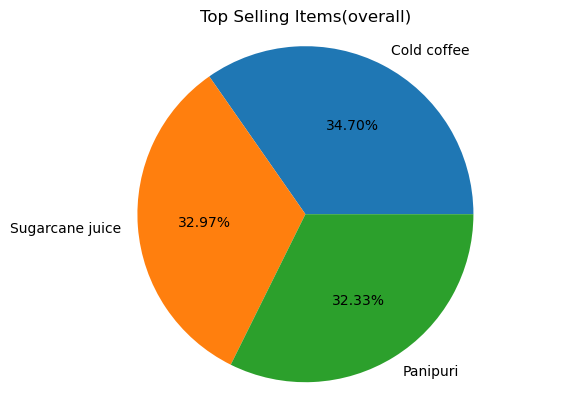

In [11]:
plt.pie(item_vals[:3], labels=item_names[:3], autopct='%1.2f%%')
plt.axis('equal')  
plt.title('Top Selling Items(overall)')
plt.show()

#### Here we find top three items that are best sellers in Balaji 
1. Cold coffee
2. Sugarcane juice
3. Panipuri

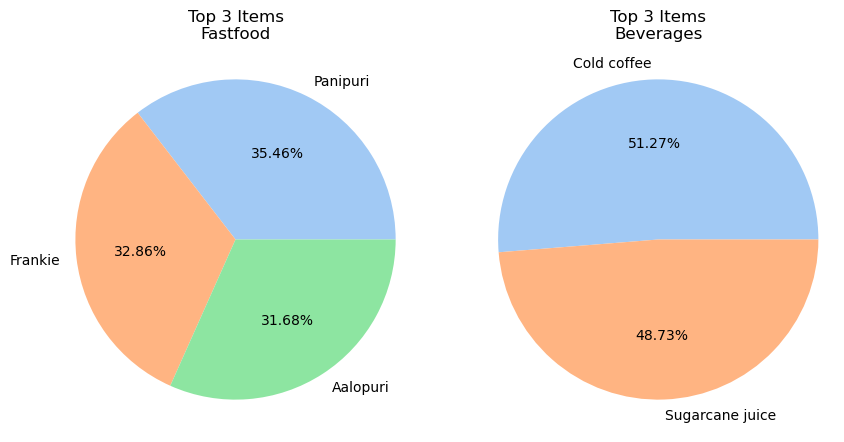

In [12]:
# Get unique item types
item_types = bljsales['item_type'].unique()
num_types = len(item_types)

# Create subplots in one row
fig, axes = plt.subplots(1, num_types, figsize=(5 * num_types, 5))

# If only one item_type, axes is not iterable, so we fix that
if num_types == 1:
    axes = [axes]

# Loop through item types and plot on subplots
for i, item_type in enumerate(item_types):
    group = bljsales[bljsales['item_type'] == item_type]
    top_items = group['item_name'].value_counts().nlargest(3)

    # Generate a color palette (e.g., 'pastel' palette)
    colors = sns.color_palette("pastel", n_colors=len(top_items))

    # Plot pie chart with the palette
    axes[i].pie(top_items.values, labels=top_items.index, autopct='%1.2f%%', colors=colors)
    axes[i].set_title(f'Top 3 Items\n{item_type}')
    axes[i].axis('equal')  # Equal aspect ratio for proper pie chart


plt.show()


#### Here, we got to know about the top selling items in Bevrages and Fastfood
1. In Beverage
- Cold Coffee
- Sugarcane Juice
2. In Fastfood
- Panipuri
- Frankie
- Aalopuri

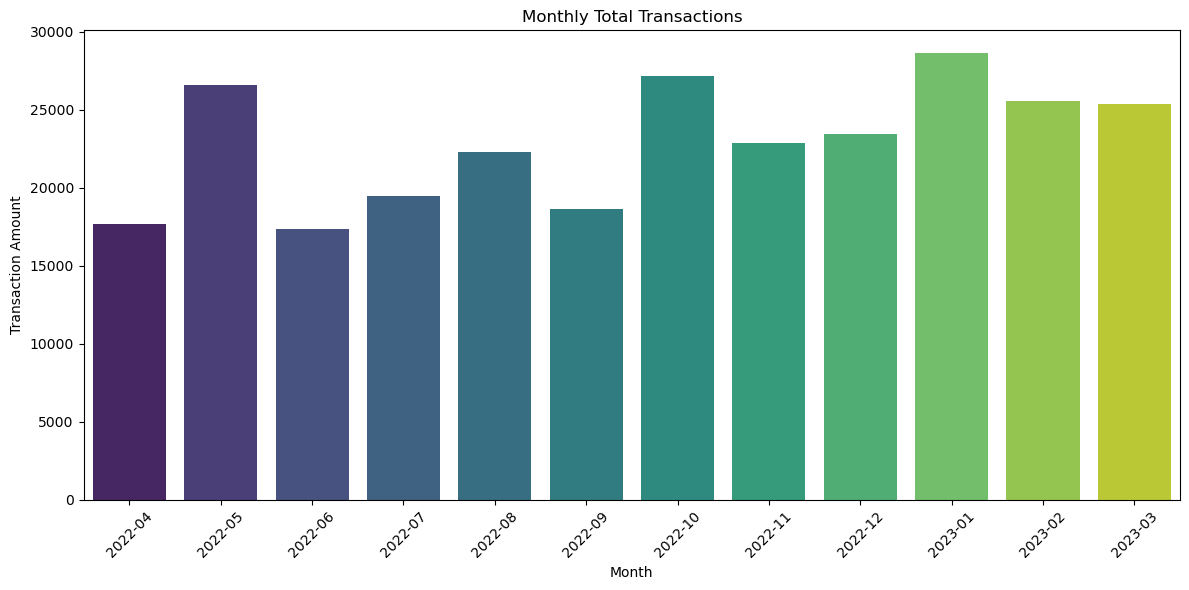

In [13]:
# Create a new 'month' column in YYYY-MM format
bljsales['month'] = bljsales['date'].dt.to_period('M').astype(str)

# Group by month and sum the transaction amount
monthly_transactions = bljsales.groupby('month')['transaction_amount'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_transactions, x='month', y='transaction_amount',  palette='viridis')

plt.xticks(rotation=45)
plt.title('Monthly Total Transactions')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

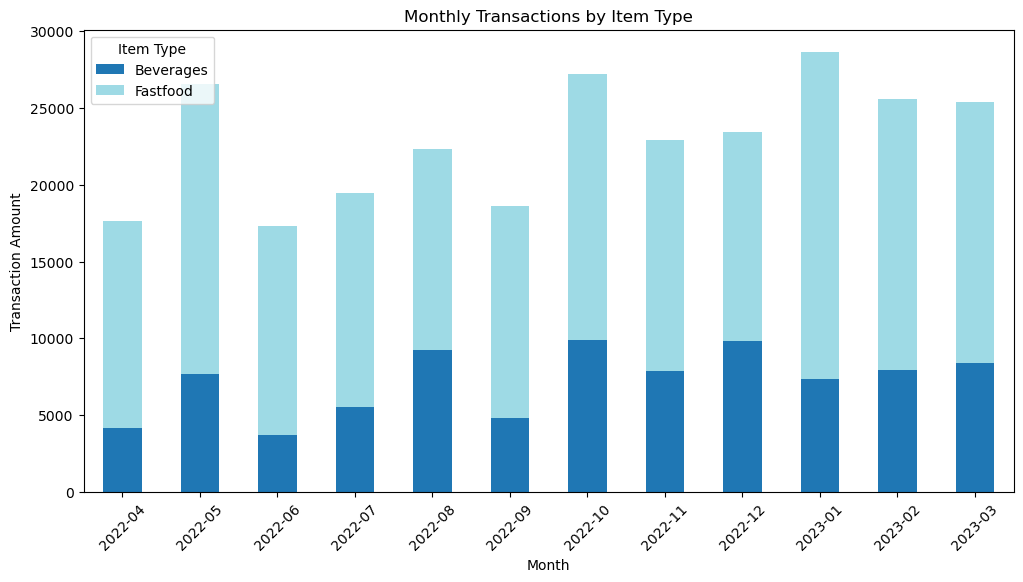

In [14]:
# Ensure date is datetime
bljsales['date'] = pd.to_datetime(bljsales['date'])

# Extract month as YYYY-MM
bljsales['month'] = bljsales['date'].dt.to_period('M').astype(str)

# Group by month and item_type, and sum transaction_amount
grouped = bljsales.groupby(['month', 'item_type'])['transaction_amount'].sum().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Monthly Transactions by Item Type')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Item Type')
plt.show()


### Observation
- We can see in Jan'23 sales were highest, 2nd highest Oct'22, and 3rd May'22 sequencely.
- It also shows in Winters sales are high while in summer only in May when it's a Vacation period sales are highest.
- Also Fastfood are high selling item then beverages.

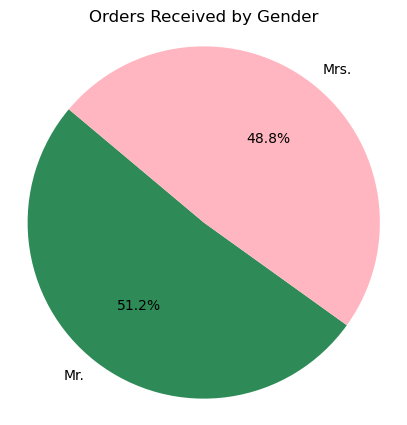

In [15]:
# Count orders by gender
gender_counts = bljsales['received_by'].value_counts()

# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['seagreen', 'lightpink'])
plt.title('Orders Received by Gender')
plt.axis('equal')
plt.show()


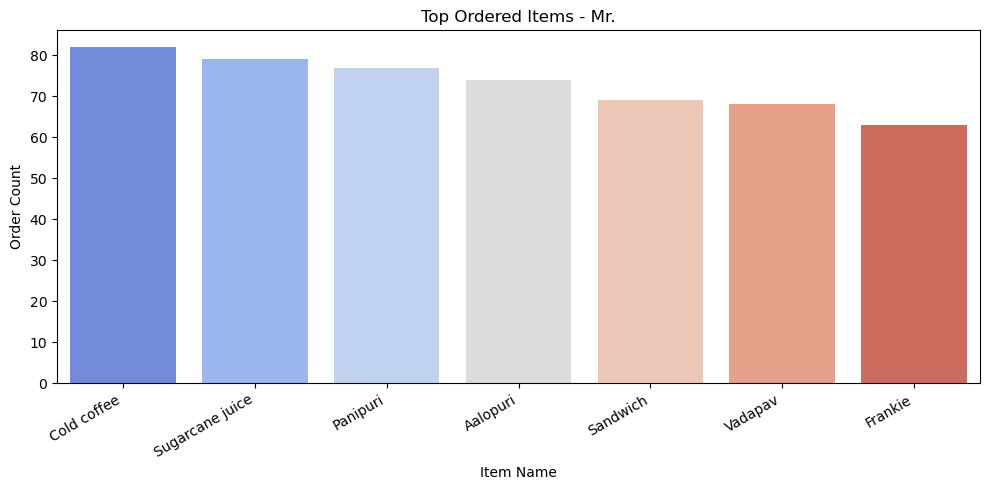

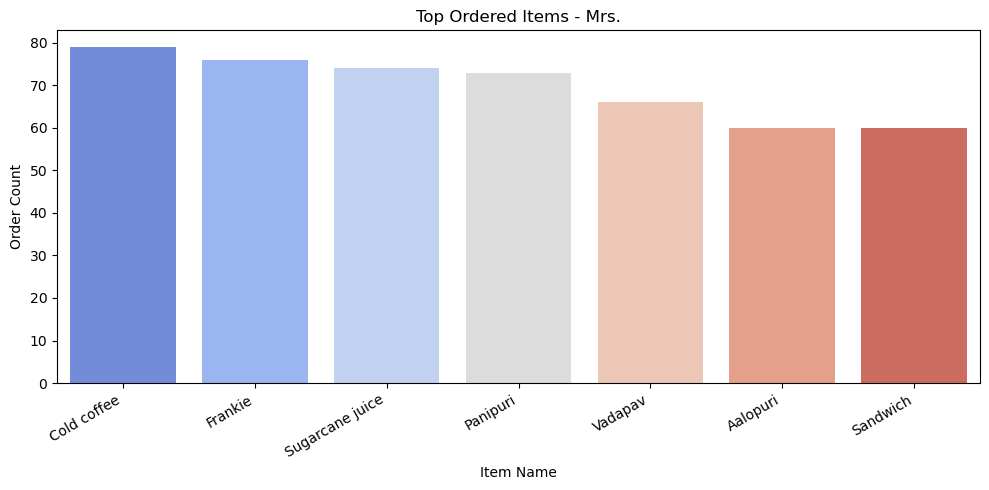

In [16]:
# Optional: If gender column values are inconsistent, clean them
bljsales['received_by'] = bljsales['received_by'].str.title()  # Ensures 'Male'/'Female'

genders = ['Mr.', 'Mrs.']

for gender in genders:
    # Filter data
    subset = bljsales[bljsales['received_by'] == gender]

    # Get top 10 items
    top_items = subset['item_name'].value_counts().nlargest(10).reset_index()
    top_items.columns = ['item_name', 'count']

    # Plot vertical bar chart
    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_items, x='item_name', y='count', palette='coolwarm')

    plt.title(f'Top Ordered Items - {gender}')
    plt.xlabel('Item Name')
    plt.ylabel('Order Count')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

#### Here, we got to know about the top selling items in 
#### 1. In Male
- Cold Coffee
- Sugarcane Juice
- Paninpuri
#### 2. In Female
- Cold coffee
- Frankie
- Sugarcane juice

In [51]:
# Group by order_id and sum the transaction_amount
order_summary = bljsales.groupby('order_id')['transaction_amount'].sum().reset_index()

# Calculation of summary statistics
average = order_summary['transaction_amount'].mean()
minimum = order_summary['transaction_amount'].min()
maximum = order_summary['transaction_amount'].max()
Summation = order_summary['transaction_amount'].sum()

print("* Summary of Sales in Balaji Company *")
print(f">> Average transaction amount per order: ₹{average:.2f}")
print(f">> Minimum transaction amount per order: ₹{minimum:.2f}")
print(f">> Maximum transaction amount per order: ₹{maximum:.2f}")
print(f">> Total Transaction: ₹{Summation:.2f}")

* Summary of Sales in Balaji Company *
>> Average transaction amount per order: ₹275.23
>> Minimum transaction amount per order: ₹20.00
>> Maximum transaction amount per order: ₹900.00
>> Total Transaction: ₹275230.00


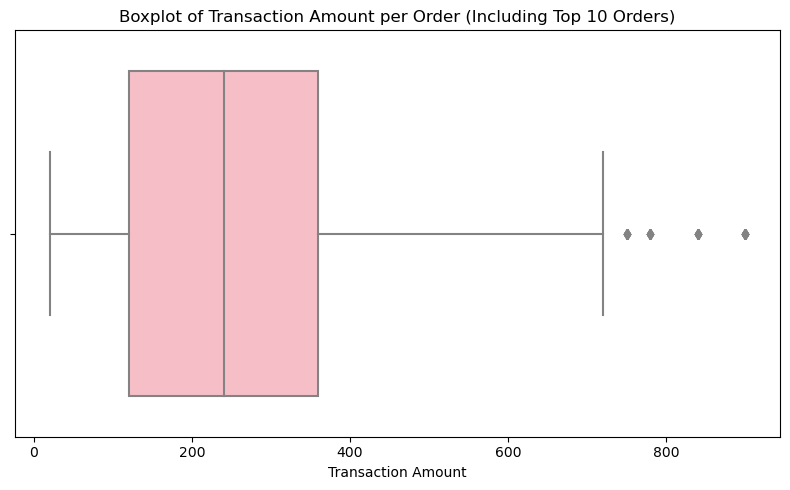

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=order_summary['transaction_amount'], color='lightpink')
plt.title('Boxplot of Transaction Amount per Order (Including Top 10 Orders)')
plt.xlabel('Transaction Amount')
plt.tight_layout()
plt.show()

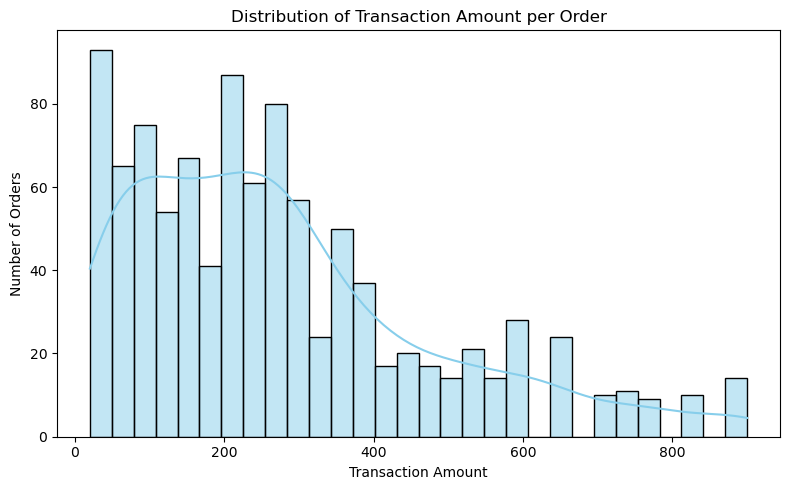

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(order_summary['transaction_amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amount per Order')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


### Observation

In the above graph, we can see that:
- Around transactional amount of 200 has the highest curve and shows highest number of orders in that phase.
- As the amount increases the number of orders decreases.

In [49]:
print("Count of transaction by cash and online according to male and female")
pd.crosstab(bljsales['received_by'], bljsales['transaction_type'])

Count of transaction by cash and online according to male and female


transaction_type,Cash,Online
received_by,,
Mr.,280,232
Mrs.,251,237


In [60]:
plot_data = bljsales.groupby(['time_of_sale', 'transaction_type', 'received_by']).size().reset_index(name='count')
plot_data


,time_of_sale,transaction_type,received_by,count
0,Afternoon,Cash,Mr.,56
1,Afternoon,Cash,Mrs.,45
2,Afternoon,Online,Mr.,57
3,Afternoon,Online,Mrs.,47
4,Evening,Cash,Mr.,58
5,Evening,Cash,Mrs.,51
6,Evening,Online,Mr.,47
7,Evening,Online,Mrs.,45
8,Midnight,Cash,Mr.,53
9,Midnight,Cash,Mrs.,60


/Users/bansari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/jn/x39k3mrd7tv8rfvsqc10cmx80000gn/T/ipykernel_1342/1852699334.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


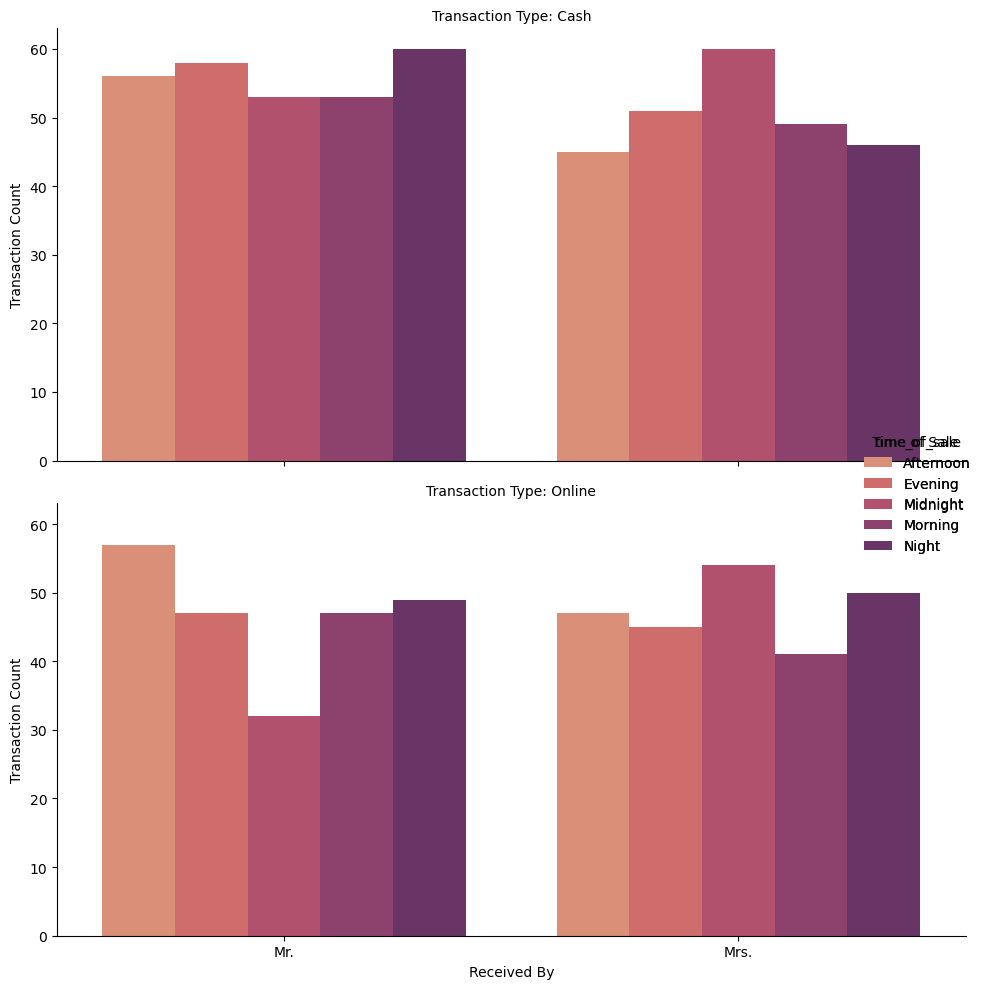

In [61]:
# Create a bar plot grid: one plot per transaction_type
g = sns.catplot(
    data=plot_data,
    x='received_by',
    y='count',
    hue='time_of_sale',
    row='transaction_type',
    kind='bar',
    height=5,
    aspect=1.5,
    palette='flare'
)

g.set_titles("Transaction Type: {row_name}")
g.set_axis_labels("Received By", "Transaction Count")
g.add_legend(title='Time of Sale ' )
plt.tight_layout()
plt.show()

### Observation

Here, transaction done most by male and female by tranction method during most time:
#### 1. in Male(Mr.):
- Cash: at Night
- Online: in Morning
#### 2. in Female(Mrs.):
- Cash: at Midnight
- Online: at Midnight

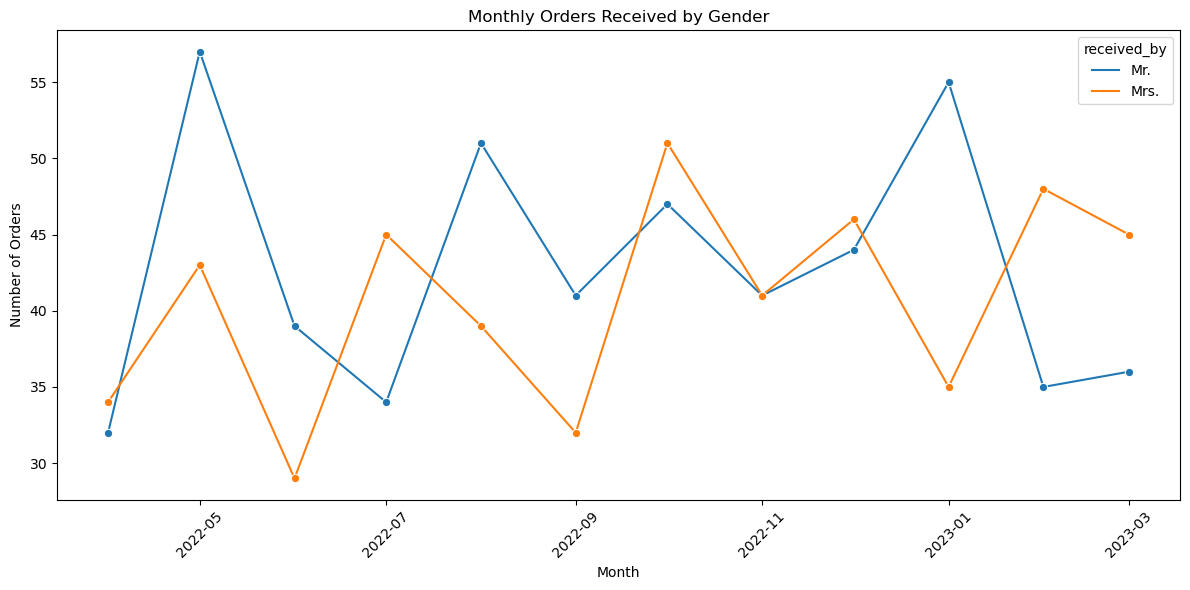

In [67]:
bljsales['month'] = bljsales['date'].dt.to_period('M').dt.to_timestamp()
monthly_received = bljsales.groupby(['month', 'received_by']).size().reset_index(name='order_count')
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_received, x='month', y='order_count', hue='received_by', marker='o')

plt.title('Monthly Orders Received by Gender')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Observation
#### Monthly ordered recieved by gender over the year.
1. Male:
- We can see the top peak at May'22 and next hike at Jan'23.
- Also there 4 months in a year of observation where orders where made highest.
- In July'22 it went the lowest of all.

2. Female:
- In female, we see orders are gradually increasing over the year yet there are some lows.
- Highest peak was in Oct'22.
- Lowest went in June'22.